# Classification Project
---

This project aims to predict customer churn for a fictional telecommunications company using a [dataset](churn.xlsx)  containing various customer attributes and their churn status. 
More information can be found [here](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113).

The goal is to create a model to predict whether or not a customer will churn based on their profile and behavior.
To achieve this, we employed three different machine learning models : Random Forest Classifier, Logistic Regression, and Support Vector Classifier (SVC). 


## Notebook content

1. Import Necessary Libraries, Reading, Exploring and Preparing Data
2. Create Random Forest Classifier model
3. Create Logistic Regression model
4. Create Support Vector Classifier (SVC) model
5. Make prediction


## 1. Import Libraries, Reading, Exploring and Preparing Data

### 1.1 Import Libraries + Reading Data

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [4]:
#upload data

df = pd.DataFrame(pd.read_csv('churn.csv'))
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


### 1.2 Exploring + Preparing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
#Check for duplicates
df.duplicated().any()

False

In [7]:
#Creating copy of df
df2 = df.copy()

In [8]:
#Dropping unnecessary columns
df2 = df2.drop(columns=['CustomerID', 'Lat Long', 'Latitude', 'Longitude',
                        'Churn Reason','Country', 'State','Count','Churn Label','Paperless Billing'])

In [9]:
df2.columns

Index(['City', 'Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score',
       'CLTV'],
      dtype='object')

In [10]:
#List of Yes/No columns
yes_no = list(df2.columns[df2.isin(['Yes']).any()])
yes_no

['Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies']

In [11]:
def column_with_other_values(df, columns):
    columns_with_other = []

    for column in columns:
        if df[column].isin(['Yes','No']).all() == False:
            columns_with_other.append(column)

    return columns_with_other

In [12]:
#These columns have values other then yes or no
#Need to explore and clean
column_with_other_values(df2,yes_no)

['Multiple Lines',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies']

In [13]:
for col in column_with_other_values(df2,yes_no):
    print(df2[col].value_counts())

Multiple Lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
Online Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
Online Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
Device Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
Tech Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
Streaming TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
Streaming Movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


In [14]:
#Notice the 'other' values are either No internet or No phone service
#We can generalize these values as No
df2['Multiple Lines'] = df2['Multiple Lines'].replace(['No phone service', 'Multiple Lines'],'No')

df2['Online Backup'] = df2['Online Backup'].replace(['No internet service', 'Online Backup'],'No')
df2['Online Security'] = df2['Online Security'].replace(['No internet service', 'Online Security'],'No')
df2['Device Protection'] = df2['Device Protection'].replace(['No internet service', 'Device Protection'],'No')
df2['Tech Support'] = df2['Device Protection'].replace(['No internet service', 'Tech Support'],'No')
df2['Streaming TV'] = df2['Streaming TV'].replace(['No internet service', 'Streaming TV'],'No')
df2['Streaming Movies'] = df2['Streaming Movies'].replace(['No internet service', 'Streaming Movies'],'No')

In [15]:
#Convert Yes/No to 1/0
mapping = {'Yes':1,'No':0}

col_map = ['Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies']

df2[col_map] = df2[col_map].replace(mapping)

In [16]:
#We convert 'Total Charges' column from object to float

df2['Total Charges'] = pd.to_numeric(df2['Total Charges'], errors='coerce')
#We fill null values in 'Total Charges' column with mean
df2['Total Charges'] = df2['Total Charges'].fillna(round(df2['Total Charges'].mean(),2))

In [17]:
# Correlation of other features to Churn Value
correlation = df2.corr(numeric_only=True)['Churn Value'].sort_values(ascending = False)

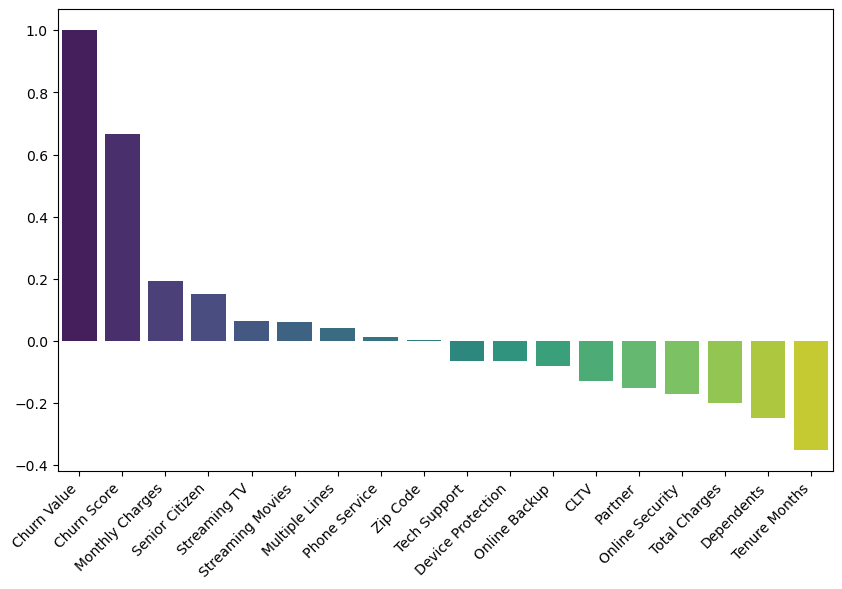

In [18]:
# Correlation barplot

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
df2['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [20]:
# Null accuracy
null_acc = 5174/(5174+1869)
print(f'Null accuracy: {null_acc}')

Null accuracy: 0.7346301292063041


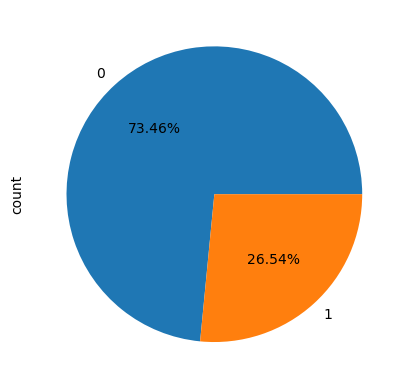

In [21]:
#Pie plot
df2['Churn Value'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

### Encoding

In [22]:
#Get a list of all object type columns
cat_feat = (df2.dtypes == 'object')
cols = list(cat_feat[cat_feat].index)

ohe = OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False).set_output(transform='pandas')

#Transform categorical columns and putting them into a dataframe
data_cols = pd.DataFrame(ohe.fit_transform(df2[cols]))

df3 = df2.copy()
# Combine dataframes
df3 = pd.concat([df3, data_cols],axis = 1).drop(columns = cols)
df3

,Zip Code,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,City_Yucca Valley,City_Zenia,Gender_Male,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,90003,0,0,0,2,1,0,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,90005,0,0,1,2,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,90006,0,0,1,8,1,1,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,90010,0,1,1,28,1,1,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,90015,0,0,1,49,1,1,0,1,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,92285,0,0,0,72,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7039,92301,0,1,1,24,1,1,1,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7040,92304,0,1,1,72,1,1,0,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,92305,0,1,1,11,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 2. RandomForest Classifier Model

In [24]:
X_r1 = df3.drop('Churn Value',axis=1)
y_r1 = df3['Churn Value']

In [25]:
# Train-test split
Xr1_train, Xr1_test, yr1_train, yr1_test = train_test_split(X_r1, y_r1, test_size=0.3, random_state=101)

In [26]:
# Create instance of model
rfc = RandomForestClassifier(max_depth = 7)

# Fit  model
rfc.fit(Xr1_train, yr1_train)

# Model prediction
yr1_pred = rfc.predict(Xr1_test)

In [27]:
# Obtain accuracy of model
from sklearn.metrics import accuracy_score

print('Model accuracy score with default parameters: {0:0.4f}'. format(accuracy_score(yr1_test, yr1_pred)))

Model accuracy score with default parameters: 0.8116


In [28]:
# Print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc.score(Xr1_train, yr1_train)))

print('Test set score: {:.4f}'.format(rfc.score(Xr1_test, yr1_test)))

Training set score: 0.8197
Test set score: 0.8116


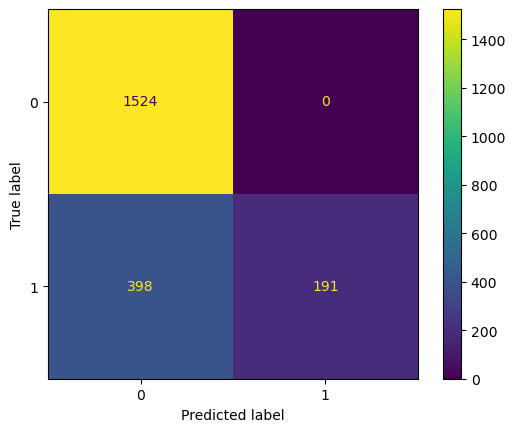

In [29]:
#Plot confusion matrix
cm = confusion_matrix(yr1_test,yr1_pred)
disp =ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)
disp.plot()
plt.show()

Comparing the null accuracy of 0.734 to the model's accuracy of 0.7676, the model does not perform significantly better then a trivial model that only predicts the most frequent occurence.

In [30]:
# Classification report

print(classification_report(yr1_test,yr1_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1524
           1       1.00      0.32      0.49       589

    accuracy                           0.81      2113
   macro avg       0.90      0.66      0.69      2113
weighted avg       0.85      0.81      0.77      2113



Looking at the confusion matrix and the classification report, we see a significant amount of false negatives generating from our model. The recall value (0.17) is extremely low. This could be due to the imbalance in the data set. Let's try to improve the model with some hyperparameter tuning.

In [31]:
# Create param_grid for gridsearch
param_grid = {
    'criterion':['entropy','gini'],
    'n_estimators': [25,50,100,150],
    'max_depth': [3,5,7,9]
}

# Instantiate grid search
grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid=param_grid,cv=5)  # tune the class_weight parameter to 'balance' in an attempt to deal with the imbalance

# Fit model
grid.fit(Xr1_train, yr1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [32]:
# Best estimators for model
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
# Creating model with best estimators
model_grid = RandomForestClassifier(max_depth=9, n_estimators=100, class_weight='balanced', criterion='gini')

model_grid.fit(Xr1_train, yr1_train)
y_pred_grid = model_grid.predict(Xr1_test)
print(classification_report(yr1_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91      1524
           1       0.72      0.89      0.79       589

    accuracy                           0.87      2113
   macro avg       0.84      0.88      0.85      2113
weighted avg       0.89      0.87      0.88      2113



In [34]:
# Obtain accuracy of model
print('Model accuracy score with hyperparameter tuning: {0:0.4f}'. format(accuracy_score(yr1_test, y_pred_grid)))

Model accuracy score with hyperparameter tuning: 0.8717


In [35]:
# Checking importance score of feature using .feature_importances__ tool
feature_scores = pd.Series(model_grid.feature_importances_, index=Xr1_train.columns).sort_values(ascending=True)
feature_scores

City_Topanga                    0.000000
City_Dillon Beach               0.000000
City_Diamond Springs            0.000000
City_Phillipsville              0.000000
City_Vidal                      0.000000
                                  ...   
Internet Service_Fiber optic    0.053323
Monthly Charges                 0.057741
Tenure Months                   0.085450
Contract_Two year               0.086091
Churn Score                     0.273360
Length: 1153, dtype: float64

Seeing city_ features have an importance score of 0, let's drop them and evaluate the impact on accuracy.

In [36]:
#New X and y without city features
X_r2 = df3[df3.columns.drop(list(df3.filter(regex='City_')))].drop('Churn Value',axis=1) #filtering out any columns contaning 'City_' from features
y_r2 = df3['Churn Value']

In [37]:
Xr2_train, Xr2_test, yr2_train, yr2_test = train_test_split(X_r2, y_r2, test_size = 0.3, random_state = 101)

forest_grid= GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid=param_grid,cv=5)

forest_grid.fit(Xr2_train, yr2_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [38]:
# Best estimators for model
forest_grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
# Final Random forest model
forest_final = RandomForestClassifier(max_depth=9, n_estimators=50, class_weight='balanced', criterion='gini')

forest_final.fit(Xr2_train, yr2_train)
# Evaluate model
y_pred_forest = forest_final.predict(Xr2_test)

# Check accuracy score
print('Model accuracy score with unimportant features removed : {0:0.4f}'. format(accuracy_score(yr2_test, y_pred_forest)))

Model accuracy score with unimportant features removed : 0.9252


In [40]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(forest_final.score(Xr2_train, yr2_train)))

print('Test set score: {:.4f}'.format(forest_final.score(Xr2_test, yr2_test)))

Training set score: 0.9487
Test set score: 0.9252


Here, the training-set accuracy score is 0.9477 while the test-set accuracy to be 0.9243. The two accuracies are quite close to each other showing no signs of overfitting.

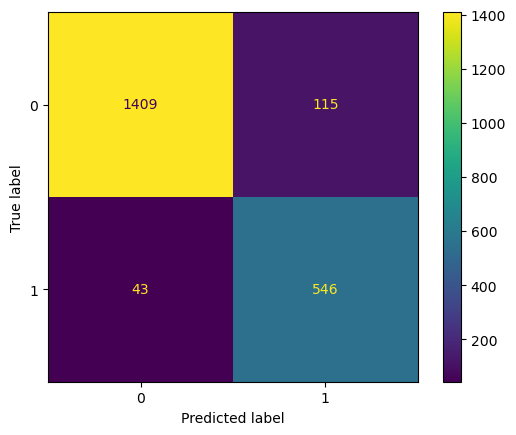

In [41]:
# Plot confusion Matrix
cm_forest = confusion_matrix(yr2_test,y_pred_forest)
disp =ConfusionMatrixDisplay(cm_forest,display_labels=forest_final.classes_)
disp.plot()
plt.show()

In [42]:
# Classification report of final RFC model
print(classification_report(yr2_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1524
           1       0.83      0.93      0.87       589

    accuracy                           0.93      2113
   macro avg       0.90      0.93      0.91      2113
weighted avg       0.93      0.93      0.93      2113



## 3. Logistic Regression model

In [43]:
#Let's prepare data for analysis

#We separate the features from labels into 2 object X and y
X_lr = df3.drop(['Churn Value'],axis=1)
y_lr = df3['Churn Value']

# Train-test split
Xlr_train, Xlr_test, ylr_train, ylr_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=101)

# Scale data
scaler = StandardScaler()
scaled_Xlr_train = scaler.fit_transform(Xlr_train)
scaled_Xlr_test = scaler.transform(Xlr_test)

# Create a logistic Regression model and fit
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)
log_model.fit(scaled_Xlr_train, ylr_train)

LogisticRegression(max_iter=5000, multi_class='ovr', solver='saga')

In [44]:
# Model prediction
ylr_pred = log_model.predict(scaled_Xlr_test)

In [45]:
# Accuracy score
accuracy = accuracy_score(ylr_test, ylr_pred)
print('Model accuracy score with default parameters:{:.2f}'.format(accuracy))

Model accuracy score with default parameters:0.88


[[1381  143]
 [ 120  469]]


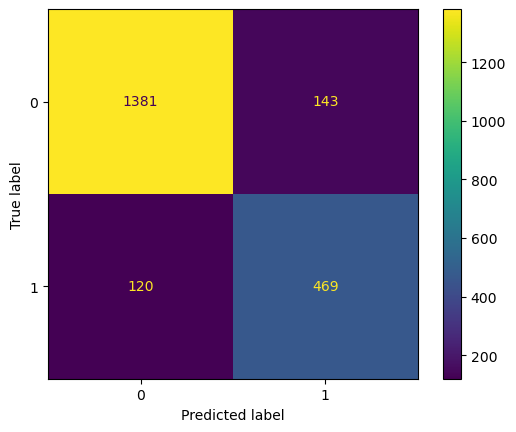

In [46]:
# Confusion matrix
cm = confusion_matrix(ylr_test, ylr_pred)
print(cm)

# Confusion matrix plot
disp = ConfusionMatrixDisplay(cm, display_labels=log_model.classes_)
disp.plot()
plt.show()

A useful tool for model evaluating, especially when we have imbalanced classes, is the precision-recall curve which shows us the Area Under the precision-recall curve (AUC-PR). The higher AUC-PR, the better our performance. Let's create the precision-recall curve.

<function matplotlib.pyplot.show(close=None, block=None)>

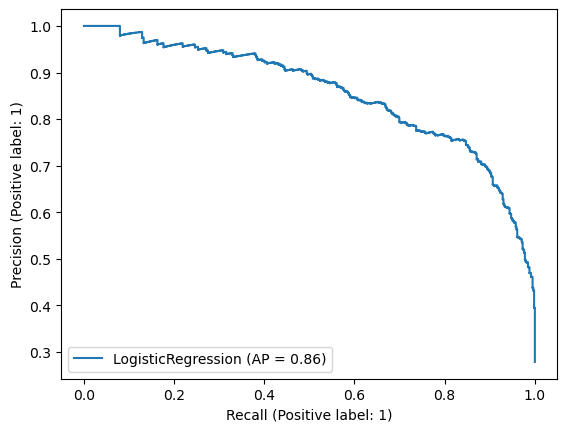

In [47]:
# precision-recall curve
PrecisionRecallDisplay.from_estimator(estimator=log_model, X= scaled_Xlr_test, y=ylr_test)
plt.show

According to our plot we can notice that the AUC-PR is not the highest and can be higher, meaning our model can perform better.

In order to improve our model performance, we'll use Cross-validation with GridSearch to find best hyper-parameters.

In [48]:
# We create new X and y without city features and split into training-testing
X_lr2 = df3[df3.columns.drop(list(df3.filter(regex='City_')))].drop('Churn Value',axis=1)
y_lr2 = df3['Churn Value']

# Train-test split
Xlr2_train, Xlr2_test, ylr2_train, ylr2_test = train_test_split(X_lr2, y_lr2, test_size=0.3, random_state=101)

In [49]:
#GridSearch for Best Hyper-Parameters with penalty and C value

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

# We initialize a GridSearchCV object with our logic regression model and parameter grid
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [50]:
# Scale data
scaler = StandardScaler()
scaled_Xlr2_train = scaler.fit_transform(Xlr2_train)
scaled_Xlr2_test = scaler.transform(Xlr2_test)

In [51]:
# Fit model
grid_model.fit(scaled_Xlr2_train,ylr2_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [52]:
# We repport back our search's best parameters
grid_model.best_estimator_.get_params()

{'C': 7.742636826811269,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [53]:
# Creating model with best estimators

best_model = grid_model.best_estimator_
ylr2_pred = best_model.predict(scaled_Xlr2_test)

# Classification report
report2 = classification_report(ylr2_test, ylr2_pred)
print(report2)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1524
           1       0.86      0.85      0.86       589

    accuracy                           0.92      2113
   macro avg       0.90      0.90      0.90      2113
weighted avg       0.92      0.92      0.92      2113



## 4. Support Vector Classifier (SVC)

In [54]:
# Seperating X features and y
X_sv = df3[df3.columns.drop(list(df3.filter(regex='City_')))].drop('Churn Value',axis=1)
y_sv = df3['Churn Value']

In [55]:
# Train-test split
from sklearn.model_selection import train_test_split
Xsv_train, Xsv_test, ysv_train, ysv_test = train_test_split(X_sv, y_sv, test_size=0.3, random_state=1)

In [56]:
# Scale data

scaler = StandardScaler()
scaled_Xsv_train = scaler.fit_transform(Xsv_train)
scaled_Xsv_test = scaler.transform(Xsv_test)

In [57]:
# Instance of model

model_svc = SVC(class_weight='balanced')

In [58]:
# Gridsearch

param = {'C': [0.001,0.01,0.1,0.5,1],
         'gamma': ['scale','auto'],
         'kernel': ['rbf','poly','linear','sigmoid']
        }

svc_grid = GridSearchCV(model_svc,param_grid=param)

In [59]:
svc_grid.fit(scaled_Xsv_train,ysv_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [60]:
svc_grid.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [61]:
#Create SVC model with best parameters
svc_final = SVC(class_weight='balanced',
                C=0.1,
                gamma = 'scale',
                kernel = 'linear')
svc_final.fit(scaled_Xsv_train,ysv_train)

SVC(C=0.1, class_weight='balanced', kernel='linear')

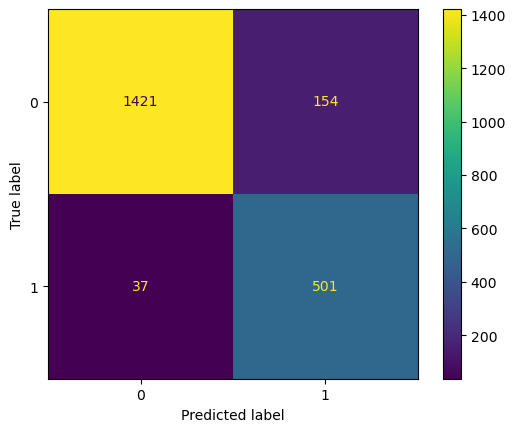

In [62]:
# Confusion matrix
# model predictions
y_pred_svc = svc_final.predict(scaled_Xsv_test)

cm = confusion_matrix(ysv_test,y_pred_svc)
disp =ConfusionMatrixDisplay(cm,display_labels=svc_final.classes_)
disp.plot()
plt.show()

In [63]:
# Classification report
print(classification_report(ysv_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1575
           1       0.76      0.93      0.84       538

    accuracy                           0.91      2113
   macro avg       0.87      0.92      0.89      2113
weighted avg       0.92      0.91      0.91      2113



With the goal being able to determine who 'will' likely churn, having a high precision score for label 1 is ideal. Despite the high overall accuracy of 0.91 of the SVM model, the precision score for label 1 is only 0.76. 

## 5. Prediction

The evaluation of our 3 models for predicting churn demontrates that they are all around 0.91-0.92 in terms of accuracy. To make prediction we will choose random forest which shows slightly better performance

In [64]:
#Creating fake data
# Select any row
input_data = df.iloc[[1800]]
input_data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1800,0617-AQNWT,1,United States,California,North Hills,91343,"34.238802, -118.482296",34.238802,-118.482296,Female,...,Two year,No,Electronic check,47.85,3147.5,Yes,1,66,6347,Competitor made better offer


In [65]:
#Modify data
input_data['Contract'] = 'One year'
input_data['Churn Score'] = 75
input_data['Gender'] = 'Male'
input_data['Total Charges'] = 200
input_data['Tenure Months'] = 69

In [66]:
input_data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1800,0617-AQNWT,1,United States,California,North Hills,91343,"34.238802, -118.482296",34.238802,-118.482296,Male,...,One year,No,Electronic check,47.85,200,Yes,1,75,6347,Competitor made better offer


In [67]:
#Clean data
input_data = input_data.drop(columns=['CustomerID', 'Lat Long', 'Latitude', 'Longitude', 'Churn Reason','Country'
                        ,'State','Count','Churn Label','Paperless Billing'])

In [68]:
input_data['Multiple Lines'] = input_data['Multiple Lines'].replace(['No phone service', 'Multiple Lines'],'No')

input_data['Online Backup'] = input_data['Online Backup'].replace(['No internet service', 'Online Backup'],'No')
input_data['Online Security'] = input_data['Online Security'].replace(['No internet service', 'Online Security'],'No')
input_data['Device Protection'] = input_data['Device Protection'].replace(['No internet service', 'Device Protection'],'No')
input_data['Tech Support'] = input_data['Device Protection'].replace(['No internet service', 'Tech Support'],'No')
input_data['Streaming TV'] = input_data['Streaming TV'].replace(['No internet service', 'Streaming TV'],'No')
input_data['Streaming Movies'] = input_data['Streaming Movies'].replace(['No internet service', 'Streaming Movies'],'No')

In [69]:
#Convert Yes/No to 1/0
mapping = {'Yes':1,'No':0}

col_map = ['Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies']

input_data[col_map] = input_data[col_map].replace(mapping)

In [70]:
#We convert 'Total Charges' column from object to float

input_data['Total Charges'] = pd.to_numeric(input_data['Total Charges'], errors='coerce')
#We fill null values in 'Total Charges' column with mean
input_data['Total Charges'] = input_data['Total Charges'].fillna(round(input_data['Total Charges'].mean(),2))

In [71]:
#get dummies for categorical data
new_input_dummy = pd.get_dummies(input_data, columns=cols,dtype=float)

In [72]:
# Add missing columns to the new input
for col in df3.columns:
    if col not in new_input_dummy.columns:
        new_input_dummy[col] = 0

In [73]:
# Correct the order of columns
new_input_dummy = new_input_dummy[df3.columns]

In [74]:
# Remove dependent variable
new_input_dummy = new_input_dummy[new_input_dummy.columns.drop(list(df3.filter(regex='City_')))].drop('Churn Value',axis=1)

In [75]:
#Predictions using random forest model
prediction = forest_final.predict(new_input_dummy)
prediction[0]

0

The model predicted it was not churned despite raising the churn score to 75. The increase tenure months must have impacted the result of the model. Looking back at the correlation graph, churn score was directly correlated with churn value whereas tenure months was inversely correlated with churn value. Another factor to take into consideration is the contract feature being swapped from 2 to 1 year. The 2 year contract was ranked second highest in terms of feature importance.